In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 99 (delta 8), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (99/99), done.


# Ассоциативные правила

Обучение на ассоциативных правилах (далее Associations rules learning — ARL) представляет из себя, с одной стороны, простой, с другой — довольно часто применимый в реальной жизни метод поиска взаимосвязей (ассоциаций) в датасетах, или, если точнее, айтемсетах (itemsests).

В общем виде ARL можно описать как «Кто купил x, также купил y». В основе лежит анализ транзакций, внутри каждой из которых лежит свой уникальный itemset из набора items. При помощи ARL алогритмов находятся те самые «правила» совпадения items внутри одной транзакции, которые потом сортируются по их силе. Все, в общем, просто.

В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (нет, там продавали не наркотики и даже не лекарства, точнее, не только лекартсва. Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». К сожалению такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

## Описание Association rule

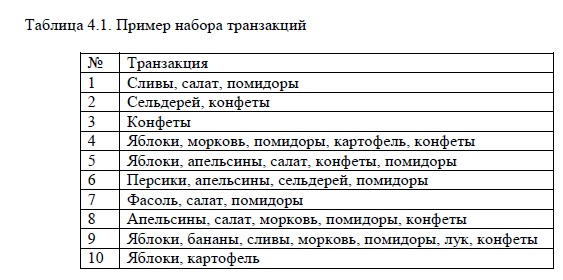

Визуальный анализ примера показывает, что все четыре транзакции, в которых фигурирует салат, также включают помидоры и что четыре из семи транзакций, содержащих помидоры, также содержат салат. Салат и помидоры в большинстве случаев покупаются вместе. Ассоциативные правила позволяют обнаруживать и количественно описывать такие совпадения.

Ассоциативное правило состоит из двух наборов предметов, называемых условием (antecedent) и следствием (consequent), записываемых в виде X →Y ,что читается так: "Из X следует Y".

Таким образом, ассоциативное правило формулируется в виде: `«Если условие, то следствие»`.
Условие может ограничиваться только одним предметом. Правила обычно отображаются с помощью
стрелок, направленных от условия к следствию, например, помидоры –> салат.

Ассоциативные правила описывают связь между наборами предметов, соответствующими условию и следствию. Эта связь характеризуется двумя показателями — `поддержкой (support)` и `достоверностью (confidence)`. Обозначим базу данных транзакций как D , а число транзакций в этой базе как N . Каждая транзакция Di представляет собой некоторый набор предметов.

Обозначим через `S поддержку`, `через C — достоверность`. Поддержка ассоциативного правила — это доля транзакций, которые содержат как условие, так и следствие.

Достоверность ассоциативного правила A → B представляет собой меру точности правила и определяется как отношение количества транзакций, содержащих и условие, и следствие, к количеству транзакций, содержащих только условие

![img](https://drive.google.com/uc?id=19QuYNx-DseNW4nzwAdxgzzdqp7QNd5Eh)


Ранее все используемые библиотеки уже были предустановлены
и доступны для подключения и в Jupyter, и в Google Colab. С помощью    инструкции    pip    выполним    установку    библиотеки    apyori
(pip install apyori) и подключим нужную функцию apriori, а также
проведем загрузку данных. Если вы устанавливаете а Anacobda то команда будет (conda install apyori).


In [1]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=cd1cf5536eb3a1610a653d1f4f5981db1644b1e7cd65b3b7409ffeaa90e84725
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from apyori import apriori


In [ ]:
# загрузим данные
dataset = pd.read_csv('/content/SPO_PGU/groceries - groceries.csv')
# посомтрим на датасет
dataset.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 33 columns]

Видим, что датасет у нас представляет разреженную матрицу, где в строках у нас набор items в каждой транзакции.

Заменим NaN на последнее значение внутри транзакции, чтобы потом было легче обрабатывать весь датасет.

In [ ]:
dataset.fillna(method = 'ffill', axis = 1, inplace = True)
cols = dataset.columns
cols

Index(['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7',
       'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13',
       'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19',
       'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25',
       'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31',
       'Item 32'],
      dtype='object')

Так как первый стобец в выборки это порядковый номер, удалим этот столбец.

In [ ]:
dataset.drop(cols[0], inplace=True, axis=1)
dataset

Item 2            Item 3                    Item 4  \
0     semi-finished bread         margarine               ready soups   
1                  yogurt            coffee               ready soups   
2                  yogurt            coffee               ready soups   
3                  yogurt      cream cheese              meat spreads   
4              whole milk    condensed milk  long life bakery product   
...                   ...               ...                       ...   
9830              chicken              beef            hamburger meat   
9831              chicken              beef            hamburger meat   
9832         citrus fruit  other vegetables                    butter   
9833        bottled water              soda              bottled beer   
9834       tropical fruit  other vegetables                   vinegar   

                        Item 5                    Item 6  \
0                  ready soups               ready soups   
1                  ready soups               ready soups   
2                  ready soups               ready soups   
3                 meat spreads              meat spreads   
4     long life bakery product  long life bakery product   
...                        ...                       ...   
9830              citrus fruit                    grapes   
9831              citrus fruit                    grapes   
9832                    yogurt            frozen dessert   
9833                    yogurt            frozen dessert   
9834             shopping bags            frozen dessert   

                        Item 7                    Item 8  \
0                  ready soups               ready soups   
1                  ready soups               ready soups   
2                  ready soups               ready soups   
3                 meat spreads              meat spreads   
4     long life bakery product  long life bakery product   
...                        ...                       ...   
9830           root vegetables                whole milk   
9831           root vegetables                whole milk   
9832             domestic eggs                rolls/buns   
9833             domestic eggs                rolls/buns   
9834             domestic eggs                rolls/buns   

                        Item 9                   Item 10  \
0                  ready soups               ready soups   
1                  ready soups               ready soups   
2                  ready soups               ready soups   
3                 meat spreads              meat spreads   
4     long life bakery product  long life bakery product   
...                        ...                       ...   
9830                    butter        whipped/sour cream   
9831                    butter        whipped/sour cream   
9832                       rum           cling film/bags   
9833                       rum           cling film/bags   
9834                       rum           cling film/bags   

                       Item 11  ...                   Item 23  \
0                  ready soups  ...               ready soups   
1                  ready soups  ...               ready soups   
2                  ready soups  ...               ready soups   
3                 meat spreads  ...              meat spreads   
4     long life bakery product  ...  long life bakery product   
...                        ...  ...                       ...   
9830                     flour  ...               dental care   
9831                     flour  ...               dental care   
9832                     flour  ...               dental care   
9833                     flour  ...               dental care   
9834                     flour  ...               dental care   

                       Item 24                   Item 25  \
0                  ready soups               ready soups   
1                  ready soups               ready soups   
2                 

Сформируем из данных  набор  транзакций  для функции  apriori


In [ ]:
#создаим из них матрицу
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])


In [ ]:
#загружаем apriori

# и обучимся правилам. Обратите внимание, что пороговые значения мы вибираем сами в зависимости от того,
# насколкьо "сильные" правила мы хотим получить
# min_support -- минимальный support для правил (dtype = float).
# min_confidence -- минимальное значение confidence для правил (dtype = float)
# min_lift -- минимальный lift (dtype = float)
# max_length -- максимальная длина itemset (вспоминаем про k-itemset)  (dtype = integer)

result = list(apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))

In [ ]:
association_results = list(result)

Давайте сначала найдем общее количество правил, добытых априорным классом. Выполните следующий скрипт:


In [ ]:
print(len(result))

89


Приведенный выше сценарий должен вернуть 101. Каждый элемент соответствует одному правилу. Напечатаем первый элемент в списке result, чтобы увидеть первое правило. Выполните следующий скрипт:

In [ ]:
print(result[0])

RelationRecord(items=frozenset({'baking powder', 'sugar'}), support=0.0037328356219170776, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'sugar'}), confidence=0.20895522388059698, lift=6.269492537313432)])


Первый элемент в списке - это сам список, содержащий три элемента. Первый элемент списка показывает продукты в правиле.

Например, из первого пункта видно, что разрыхлитель и сахар обычно покупают вместе. Это имеет смысл, поскольку люди, которые покупают разрыхдитель, им для выпечки может понадобиться сахар, поэтому они с большей вероятностью будут покупать сахар. Или это может означать, что в рецептах выпечки часто используют разрыхлитель.

Значение поддержки для первого правила - 0,0037. Это число рассчитывается путем деления количества транзакций, содержащих разрыхлитель, на общее количество транзакций. Уровень достоверности для правила составляет 0,2089, что показывает, что из всех транзакций, содержащих разрыхлитель, 20,89% транзакций также содержат сахар. Наконец, лифт на 6,26 говорит нам о том, что вероятность того, что сахар будет куплен покупателями, которые покупают разрыхлитель, в 6,26 раза выше, чем вероятность продажи сахара по умолчанию.

Следующий скрипт более наглядно отображает правило, поддержку, достоверность и лифт для каждого правила.

In [ ]:
ruls=[]
for item in result:

    # первый индекс внутреннего списка
    # Содержит базовый предмет и добавляет предмет
    pair = item[0]
    items = [x for x in pair]
    v1=str(items[0])
    v2= str(items[1])

    #второй индекс внутреннего списка
    v3= str(item[1])

    #третий индекс списка, расположенный на 0-м месте
    #третьего индекса внутреннего списка

    v4= str(item[2][0][2])
    v5=str(item[2][0][3])
    rows=(v1,v2,v3,v4,v5)
    ruls.append(rows)
label=['title1','title2','suppot','confidence','lift']
nm=pd.DataFrame.from_records(ruls,columns=label)
nm

title1  ...                lift
0        baking powder  ...   6.269492537313432
1               liquor  ...   5.070460058053998
2                flour  ...    8.63751515151515
3                  ham  ...    8.20750175070028
4                  ham  ...  4.8231738683127565
..                 ...  ...                 ...
84  whipped/sour cream  ...   4.379177355152587
85             sausage  ...   4.368666278392546
86  whipped/sour cream  ...   6.042140964493906
87     root vegetables  ...         7.618203125
88     root vegetables  ...   5.582977190876351

[89 rows x 5 columns]

Здесь мы создали таблицу с наборами правил, а также вывели их характеристики (поддержку, достоверность и лифт) для дальнейшего анализа. Больше всего аналитикам важны правила с высокой достоверностью и поддержкой. Для этого нам нужно получившиеся правила отсортировать по максимальной достоверности.

In [ ]:
g.sort_values(by=['confidence'], ascending=False).head(20)

title1  ...               lift
confidence                               ...                   
0.5714285714285714   whipped/sour cream  ...  4.161442441054091
0.559322033898305          cream cheese  ...  4.073276287641928
0.5319148936170213          canned beer  ...  5.556954898358324
0.5                     root vegetables  ...  4.524125452352232
0.4833333333333333                 beef  ...  4.373321270607157
0.4754098360655738                 beef  ...  4.301627479285728
0.4461538461538462      root vegetables  ...  4.036911942098914
0.4444444444444444                 beef  ...  4.021444846535317
0.4385964912280702              sausage  ...  4.726885460778383
0.43661971830985913  whipped/sour cream  ...  4.156198612997783
0.4339622641509434        domestic eggs  ...  5.897012578616352
0.4285714285714286      root vegetables  ...  4.079586656997825
0.423728813559322        tropical fruit  ...  4.033489632624968
0.4133333333333334       tropical fruit  ...  7.295090196078432
0.40963855421686746              liquor  ...  5.070460058053998
0.3731343283582089   whipped/sour cream  ...  5.070435864157473
0.3661971830985915   whipped/sour cream  ...  4.976168605837926
0.3658536585365854   whipped/sour cream  ...  4.971500530222694
0.35                 whipped/sour cream  ...  4.790784671532847
0.3466666666666667   whipped/sour cream  ...  4.710772946859904

[20 rows x 4 columns]

##Домашнее задание

1. Используя   файл   демонстрационного   примера    https://www.kaggle.com/d4rklucif3r/market-basket-optimisation, построить ассоциативные
правила для некоторой торговой фирмы.
2. Провести  анализ  рыночной  корзины  
3.
– найти правила, представляющие интерес;
– найти правило, имеющее максимальный лифт;
– найти  товары,  которые  покупают  вместе  с  поздравительной  открыткой, какая    из    этих    ассоциаций    представляет    наибольший    интерес    (имеет максимальный лифт).
